# Regressionsrechnung

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
5.2 Regression | Methode der kleinsten Quadrate (Statistik Grundlagen)

<iframe width="200" height="113" src="https://www.youtube.com/embed/lQU2tBGOgzo?si=tOTZxzwBWsZj8tsA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Bisher haben wir uns auf die Analyse von Messreihen konzentriert, bei denen einzelne Messwerte betrachtet wurden, um Mittelwerte und Standardabweichungen zu berechnen. Im letzten Kapitel haben wir jedoch bereits gesehen, dass es Situationen gibt, in denen verschiedene Messgrößen gemessen werden und diese unter Umständen eine Abhängigkeit oder Korrelation untereinander aufweisen können.

Dies bedeutet beispielsweise, dass wir eine Messgröße y haben, die eine Funktion einer anderen Messgröße x ist:

$$y = f(x)$$

Grundsätzlich ist jeder funktionale Zusammenhang $f(x)$ möglich. Es kann jedoch auch vorkommen, dass der Zusammenhang linear ist. In jedem Fall sollte der Typ der Fit-Funktion $y = f(x)$ im Voraus festgelegt und begründet werden. Es ist keine wissenschaftliche oder messtechnische Vorgehensweise, alle möglichen Funktionen ohne klaren Grund auszuprobieren und sich dann für die besten zu entscheiden. Dies könnte zu unbrauchbaren Näherungen oder sogar zu falschen und nicht wissenschaftlichen Ergebnissen führen, was vermieden werden sollte.

Wenn wir Messungen von y für verschiedene Werte von x durchführen, erhalten wir verschiedene Punkte im Messbereich. Die Werte werden wahrscheinlich um eine Gerade streuen, das heißt, sie liegen nicht perfekt auf einer Geraden. Dies liegt einfach daran, dass es zufällige Fehler gibt.

Regressionskoeffizient b (Geraden-Steigung): 0.6066538042940539
Regressionskoeffizient a (Ordinatenabschnitt): 4.714841199168873


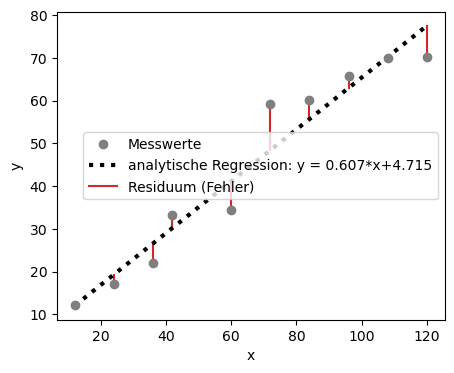

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate

# Erstellen der DataFrames
data = pd.DataFrame({'x': x, 'y': y})

# Berechnung der Regressionskoeffizienten
x_mean = data['x'].mean()
y_mean = data['y'].mean()
xy_mean = (data['x'] * data['y']).mean()
x_squared_mean = (data['x']**2).mean()

b = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean**2)
a = y_mean - b * x_mean

print("Regressionskoeffizient b (Geraden-Steigung):", b)
print("Regressionskoeffizient a (Ordinatenabschnitt):", a)

# Berechnung der Gütefunktion
data['b*x+a'] = b * data['x'] + a
data['y-(b*x+a)'] = data['y'] - data['b*x+a']
data['[y-(b*x+a)]^2'] = data['y-(b*x+a)']**2
sum_of_squared_residuals = data['[y-(b*x+a)]^2'].sum()



# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße

plt.figure(figsize=(5,4)) # Plot-Größe
plt.plot(x,y,'o', color='tab:gray', zorder=3)
plt.plot(x,b*x+a,lw=3, color="black", ls = ':')  # plot Ausgleichsgerade mit m und b
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.xticks([])
#plt.yticks([])
plt.legend(['Messwerte', 'Modellfunktion, hier eine Gerade', 'Residuum (Fehler)'])
plt.show()

Um die optimale Gerade zu bestimmen, führen wir eine **lineare Regression** durch, um die Daten anzunähern. Die optimale Gerade hat im Idealfall die Form:

$$y = a + b \cdot x + E$$

Hierbei ist $b$ die Steigung der Geraden, $a$ der Achsenabschnitt und $E$ der Fehler, der durch den Abstand der Geraden von den Messpunkten entsteht.

Wie bestimmen wir diese Gerade? Kurz gesagt, suchen wir ein geeignetes Modell für unsere Daten und möchten die Modellparameter ermitteln. Das Modell soll möglichst gut die Messdaten vorhersagen. Die Anpassung des Modells erfolgt häufig mithilfe der Methode der kleinsten Quadrate, die sich für die Modellierung von nahezu allen Arten von Messdaten eignet.


:::{admonition} Tutorial
:class: tip
Python-Beispiele für Kurvenanpassungen findet ihr hier:
* [Vergleich verschiedener Fit-Routinen](T_LinReg)
* [Regression mit Fehlerbalken](T_FitmitFehlerbalken)
* [Klimadaten anpassen](T_Plotten)
:::

## Least-Squares: Methode der kleinsten Quadrate

Unser Ziel ist es, die Abweichung der Messwerte von der Geraden (oder allgemein von der Funktion $f$) so gering wie möglich zu halten. Wie bereits beim Berechnen von Mittelwerten und Standardabweichungen verwenden wir die Quadrate der Abweichungen. Dadurch werden positive und negative Abweichungen nicht ausgeglichen, und größere Abweichungen werden stärker (quadratisch) gewichtet.

Hierfür definieren wir die Funktion $Q$, die von den Geradenparametern $b$ und $a$ abhängt und als **Gütefunktion** definiert ist:

$$Q(b,a) = \sum_{i = 1}^N [y_i - (b\cdot x_i + a)]^2 = \mathrm{min !}$$

In dieser Funktion werden zunächst die Unterschiede zwischen den Messwerten und der theoretischen Geradenfunktion berechnet. Diese Differenzen werden dann quadriert und schließlich für alle Messwerte $y_i$ aufsummiert. Unser Ziel ist es, diese Summe zu minimieren.

```{warning}
Es handelt sich um ein *Minimierungsproblem*, das je nach Art der Modellfunktion unterschiedlich gelöst wird. Im Folgenden werden wir es für eine lineare Funktion lösen.
```

Um die Parameter $a$ und $b$ zu minimieren, leiten wir die Funktion $Q$ nach diesen Parametern ab und setzen die Ableitungen gleich Null, um die Extremstellen (in diesem Fall das Minimum) zu finden. Wir leiten $Q$ also nach $b$ und $a$ ab:

$$\frac{dQ}{db} = -2 \sum_{i = 1}^{N} x_i (y_i - bx_i - a) = 0$$

$$\frac{dQ}{da} = -2 \sum_{i = 1}^{N} (y_i - bx_i - a) = 0$$

Durch Differentiation nach den Parametern und Gleichsetzen der Ableitungen auf Null erhalten wir die folgenden Gleichungen:

$$b\sum_{i = 1}^{N} x_i^2 + a\sum_{i = 1}^{N}x_i  = \sum_{i = 1}^{N}x_i y_i$$

$$b\sum_{i = 1}^{N} x_i + N a  = \sum_{i = 1}^{N} y_i$$

## Regressionskoeffizienten

Durch Umstellen dieser Gleichungen erhalten wir die folgenden Ausdrücke für die gesuchten besten Schätzwerte der Regressionsgeraden, auch **Regressionskoeffizienten** genannt:

$$ b = \frac{\sum_{i=1}^N (x_i y_i) - n\sum_{i=1}^N x_i }{\sum_{i=1}^N x_i^2 } = \frac{\mathrm{cov}_{xy}}{S_{x}^2} = \frac{\overline{x\cdot y} - \overline x \cdot \overline y}{\overline{x^2} - (\overline x)^2}$$

$$a = \frac{\sum_{i=1}^N y_i - b \sum_{i=1}^N x_i}{N} = \bar y - b \cdot \bar x$$

Hierbei bedeuten $\bar x$ und $\bar y$ die Durchschnittswerte der jeweiligen Messwerte:

$$\bar x = \frac{1}{N}\sum_{i = 1}^N x_i$$

$$\bar y = \frac{1}{N}\sum_{i = 1}^N y_i$$

und die Kovarianz $\mathrm{cov}_{xy}$ und die Standardabweichung $S_{x}$ der Messwerte sind:

$$\mathrm{cov}_{xy} = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)(y_i - \bar y)$$

$$S_{x}^2 = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)^2$$

Es ist wichtig anzumerken, dass wir hier die Mittelwerte für $x$ und $y$ verwenden, obwohl die $x$-Werte absichtlich während der Versuchsreihe variiert werden, wodurch sich die Größen $x$ und $y$ kontinuierlich ändern. Dies ist eine besondere Eigenschaft der Methode der kleinsten Quadrate in der linearen Regression.

Mittels diesen Gleichungen können wir für das oben gezeigte Beispiel der Messdaten die Parameter $a$ und $b$ manuell berechnen:

In [4]:
# Erstellen der DataFrames
data = pd.DataFrame({'x': x, 'y': y})

# Berechnung der Regressionskoeffizienten
x_mean = data['x'].mean()
y_mean = data['y'].mean()
xy_mean = (data['x'] * data['y']).mean()
x_squared_mean = (data['x']**2).mean()

b = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean**2)
a = y_mean - b * x_mean

print("Regressionskoeffizient b (Geraden-Steigung):", b)
print("Regressionskoeffizient a (Ordinatenabschnitt):", a)

# Berechnung der Gütefunktion
data['b*x+a'] = b * data['x'] + a
data['y-(b*x+a)'] = data['y'] - data['b*x+a']
data['[y-(b*x+a)]^2'] = data['y-(b*x+a)']**2
sum_of_squared_residuals = data['[y-(b*x+a)]^2'].sum()



Regressionskoeffizient b (Geraden-Steigung): 0.6066538042940539
Regressionskoeffizient a (Ordinatenabschnitt): 4.714841199168873


In [5]:
display(data)
print("Summe der quadrierten Abweichungen (Gütefunktion):", sum_of_squared_residuals)

,x,y,b*x+a,y-(b*x+a),[y-(b*x+a)]^2
0,12,12.2,11.994687,0.205313,0.042153
1,24,17.0,19.274533,-2.274533,5.173498
2,36,22.1,26.554378,-4.454378,19.841485
3,42,33.2,30.194301,3.005699,9.034227
4,60,34.4,41.114069,-6.714069,45.078729
5,72,59.1,48.393915,10.706085,114.620254
6,84,60.2,55.673761,4.526239,20.486842
7,96,65.7,62.953606,2.746394,7.542678
8,108,69.9,70.233452,-0.333452,0.111190
9,120,70.1,77.513298,-7.413298,54.956983


Summe der quadrierten Abweichungen (Gütefunktion): 276.88803799347016


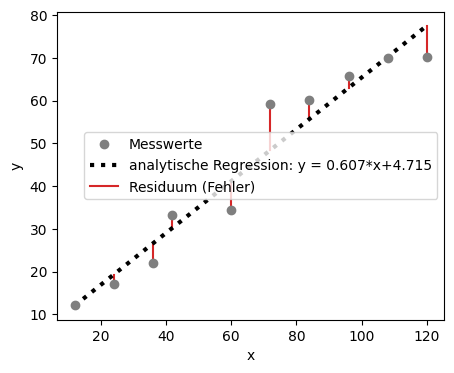

In [12]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße

plt.figure(figsize=(5,4)) # Plot-Größe
plt.plot(x,y,'o', color='tab:gray', zorder=3)
plt.plot(x,b*x+a,lw=3, color="black", ls = ':')  # plot Ausgleichsgerade mit m und b
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.xticks([])
#plt.yticks([])
plt.legend(['Messwerte', 'analytische Regression: y = %5.3f*x+%5.3f'%(b,a), 'Residuum (Fehler)'])
plt.show()

Die Regressionskoeffizienten ermöglichen uns, die Gerade zu bestimmen. In der Praxis verwendet man jedoch in der Regel nicht diese komplexen Berechnungen, sondern greift auf Funktionen zurück, die bereits in vielen Programmen vorimplementiert sind. Ein Beispiel hierfür ist die in Python vorhandene Funktion `curve_fit`. Wie das folgende Beispiel zeigt, führen sowohl die manuelle Berechnung von $b$ und $a$ als auch die Verwendung der integrierten Python-Funktion zu derselben Regressionsgeraden:

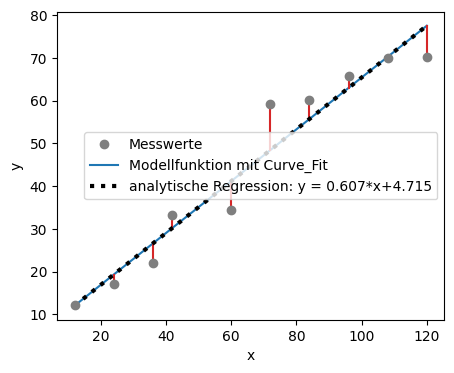

In [13]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße

plt.figure(figsize=(5,4)) # Plot-Größe
plt.plot(x,y,'o', color='tab:gray', zorder=3, label = 'Messwerte')
plt.plot(x,anpassung(x,*popt), zorder=0, color = 'tab:blue', label = 'Modellfunktion mit Curve_Fit')
plt.plot(x,b*x+a,lw=3, color="black", ls = ':', label = 'analytische Regression: y = %5.3f*x+%5.3f' %(b,a))  # plot Ausgleichsgerade mit m und b
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.xticks([])
#plt.yticks([])
plt.legend()
plt.show()


## Fehler der Regressionsgeraden

Der Fehler oder die Abweichung der Regression wird durch die Standardabweichung der Funktion $Q(b,A)$ angegeben. Dieser Fehler wird wie folgt berechnet:

$$E^2 = s^2(Q(b,a)) = \frac{Q(b,a)}{N-2}$$

Hierbei wird durch die Anzahl der Freiheitsgrade, $N-2$, geteilt, da die Messreihe endlich ist. Für endliche Messergebnisse muss $N-2$ berücksichtigt werden. In einer unendlichen Messreihe wäre dieser Faktor unendlich groß und der Fehler würde gegen Null gehen.

Der Fehler unseres $y$-Schätzwertes kann folgendermaßen ausgedrückt werden:

$$s_y = E = \sqrt{\frac{1}{N-2}\sum(y_i - bx_i - a)^2 }$$

In [8]:
N = len(y)
diff_y = 0
for i in range(N):
    diff_y += ( y[i] - b * x[i] - a )**2

streuung_y = 1/(N-2)*diff_y
s_y = np.sqrt(streuung_y)
print('Die Unsicherheit von y ist \t s_y = %5.4f' %(s_y))

Die Unsicherheit von y ist 	 s_y = 5.8831


### Berücksichtigung von Unsicherheiten

Im allgemeinen Fall, d.h. wenn die Messwerte $y_i$ mit Unsicherheiten $s_i$ behaftet sind, lässt sich die **Residuensumme** wiefolgt definieren:

$$\chi^2 = \sum_{i=1}^N \left(\frac{f(x_i)-y_i}{s_i}\right)^2$$

Für die obigen Berechnungen, und auch im Falle von konstanten Unsicherheiten, d.h. wenn für alle Werte von $y_i$ die gleiche absolute Unsicherheit existiert, ändert sich nichts. Denn es gilt $s_i = s = \mathrm{const}$ und beim "Nullsetzen" werden diese einfach eliminiert.
Gelten für die $N$ Messwerte allerdings unterschiedliche Unsicherheiten, so müssen diese miteinbezogen werden. 

### Unsicherheiten der Regressionskoeffizienten

Natürlich kann man auch die Abweichungen, Toleranzen und Vertrauensintervalle für die Regressionskoeffizienten $b$ und $a$ betrachten.

Der Fehler der Geradensteigung $b$ beträgt:

$$
\begin{align*}
s_b &= s_y \cdot \sqrt{\frac{N}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{\sum x_i^2 - N\cdot \bar x^2}} \\
& = s_y \cdot \sqrt{\frac{1}{\sum \left(x_i - \bar x \right)^2}} = s_y \cdot \sqrt{\frac{1}{N\cdot (\overline{x^2} - (\overline x)^2)}}
\end{align*}$$

Der Fehler des Ordinatenabschnitts $a$ beträgt:

$$
\begin{align*}
s_a &= s_y \cdot \sqrt{\frac{\sum x_i^2}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum x_i^2 - N\cdot \bar x^2}} \\
& = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum \left(x_i - \bar x \right)^2}} = s_b \cdot \sqrt{\overline{x^2}}
\end{align*}$$

Mithilfe dieser Standardabweichungen für $a$ und $b$ können mit der Student-t-Verteilung und Quantilen kombiniert werden, um den Vertrauensbereich anzugeben.

In [9]:
s_b = s_y * np.sqrt(1 / (N*(np.mean(x**2) - np.mean(x)**2)))
print('Die Unsicherheit von b ist \t s_b = %5.4f' %(s_b))

s_a = s_b * np.sqrt(np.mean(x**2))
print('Die Unsicherheit von a ist \t s_a = %5.4f' %(s_a))

Die Unsicherheit von b ist 	 s_b = 0.0534
Die Unsicherheit von a ist 	 s_a = 3.9581


## Korrelationskoeffizient <a id="SubSec-Korrelationskoeffizient"></a>

Für lineare Zusammenhänge ist es häufig sinnvoll den Korrelationskoeffizient zu berechnen:
    
$$r = \frac{\overline{x\cdot y} - \overline x \cdot \overline y}{\sqrt{\overline{x^2} - (\overline x)^2} \cdot {\sqrt{\overline{y^2} - (\overline y)^2}}} $$    

In [10]:
# Analytische Methode:
r = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.sqrt(np.mean(x**2) - np.mean(x)**2) * np.sqrt(np.mean(y**2) - np.mean(y)**2))
print('Der Korrelationskoeffizient zwischen x und t beträgt: %5.8f\n'%(r))

# Python:
r = np.corrcoef(x, y)
print('Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:')
print(r)

Der Korrelationskoeffizient zwischen x und t beträgt: 0.97035603

Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:
[[1.         0.97035603]
 [0.97035603 1.        ]]


Der Korrelationskoeffizient von $+ 0{,}97035$ zeigt mit positivem Vorzeichen eine direkte Proportionalität zwischen $x$ und $y$. Die geringfügige Abweichung zu +1 zeigt, dass die Messwerte dennoch leicht von dem erwarteten linearen Zusammenhang abweichen.

### Bestimmtheitsmaß <a id="SubSec-Bestimmtheitsmaß"></a>

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Bestimmtheitsmaß Regression berechnen & interpretieren 📚 einfach erklärt [Theorie/Formel] (Alles Andy)

<iframe width="200" height="113" src="https://www.youtube.com/embed/3JR95ubOuL4?si=SpqKGVuZUWvKJBvS" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::


Das **Bestimmtheitsmaß** gibt an, wie gut die Regressionsgerade zur tatsächlichen Realität passt. Es basiert auf dem Korrelationskoeffizienten, den wir bereits aus der Fehlerfortpflanzung kennen, und quadriert diesen:

$$\mathit{R}^2 = r^2 (= \textrm{Korrelation}^2)$$

Da der Korrelationskoeffizient lediglich angibt, wie stark die Messwerte um einen linearen Zusammenhang streuen, ist auch das Bestimmtheitsmaß nur für lineare Regressionen definiert. Das Bestimmtheitsmaß kann mit 100 multipliziert werden, um es in Prozent auszudrücken. Dies entspricht dem prozentualen Anteil der Streuung in $y$, der durch das lineare Modell beschrieben wird, und liegt zwischen 0% und 100%:

- 0%: Es existiert kein linearer Zusammenhang.
- 100%: Perfekter linearer Zusammenhang.

Allgemein gilt für das **Bestimmtheitsmaß**:

- Je näher $\mathit{R}^2$ an 1 liegt, desto besser passt die Kurvenanpassung.
- Für $\mathit{R}^2 = 0$ ist das Modell völlig ungeeignet, um einen Zusammenhang zwischen $x_i$ und $y_i$ vorherzusagen.
- Für $\mathit{R}^2 = 1$ kann $y$ vollständig durch das lineare Modell beschrieben werden, und alle Messpunkte liegen auf einer nicht-horizontalen Geraden. In diesem Fall besteht ein deterministischer Zusammenhang, kein stochastischer.

**Nachteile des Bestimmtheitsmaßes:**

Bei einer steigenden Anzahl von Messwerten erhöht sich $\mathit{R}^2$, ohne dass die Korrelation oder die Regression tatsächlich besser wird. Dieses Problem könnte durch ein korrigiertes $\mathit{R}^2$ behoben werden:

$$\mathit{\overline R}^2 = 1 - (1 - \mathit{R}^2) \cdot \frac{n-1}{n-p-1}$$

Dabei stehen:
- $n$ für die Anzahl der Messwerte und
- $p$ für die Anzahl der Variablen im Regressionsmodell.

Ein weiterer Nachteil ist, dass das Bestimmtheitsmaß keine Aussage darüber trifft, ob das verwendete Regressionsmodell tatsächlich korrekt ist.

## Erweiterung auf allgemeine Funktionen

Die Methode der kleinsten Quadrate kann auf jede Funktion angewendet werden, sei es beispielsweise eine Parabel. Dabei ist es von entscheidender Bedeutung, mit gesundem Menschenverstand zu prüfen, welche Funktion sich für den jeweiligen Verlauf der Messwerte am besten eignet.